In [129]:
import glob
import pandas as pd
import re
from Bio import Entrez
import time
import xml.etree.ElementTree as ET
import seaborn as sns; sns.set()
import copy
import numpy as np
from Bio import SeqIO

In [2]:
# Edit the locations below to the location of your two results folders.

files_disease = glob.glob('ptyphi_results/*species.txt')
files_control = glob.glob('typhi_results/*species.txt')

location_of_fasta = 'databases/just_viruses/just_viruses.fasta'

In [3]:
#List of sequences in the reference FASTA
fasta_ids = []

with open(location_of_fasta, "r") as handle:
    for record in SeqIO.parse(handle, "fasta") :
        fasta_ids.append(record.id)

In [7]:
#Get read hit counts from disease folder

master_list = []

for file in files_disease:
    
    list_of_seqs = copy.deepcopy(fasta_ids)
    
    name = str(file)
    
    with open(file, "r") as ifile:
        
        for line in ifile:
            
            data = line.strip().split(' ')
            data = data+[name, 'ptyphi']
            
            list_of_seqs.remove(data[1])
            
            
            master_list.append(data)
            
    for seq in list_of_seqs:
        
        data = [0, seq, name, 'ptyphi']
        
        master_list.append(data)

In [8]:
#Get read hit counts from control folder

for file in files_control:
    
    name = str(file)
    
    list_of_seqs = copy.deepcopy(fasta_ids)
    
    with open(file, "r") as ifile:
        
        for line in ifile:
            
            data = line.strip().split(' ')
            data = data+[name, 'typhi']
            master_list.append(data)
            
            
    for seq in list_of_seqs:
        
        data = [0, seq, name, 'typhi']
        
        master_list.append(data)

In [9]:
df = pd.DataFrame(columns=['count', 'seq', 'file', 'type'], data= master_list)

In [12]:
def get_srr_accession(df):
    """
    Extract the SRR number from the file_location field of the dataframe.
    """
    pattern = re.compile(r"[SED]RR[0-9]+")

    file = df['file']

    return re.search(pattern, file).group(0)

In [13]:
df['acc'] = df.apply(get_srr_accession, axis=1)

In [14]:
df['count'] = df['count'].astype(int)

In [19]:
def get_spot_count(df, email, max_errors):
    """
    Use the Entrez API to get the spot (read) count for that SRR number.
    """

    srr_acc = df['acc']
    
    print (srr_acc)

    # get SRR id
    Entrez.email = email

    error_count =0

    while error_count < max_errors:

        try:

            handle = Entrez.esearch(db="sra",term=srr_acc)

            record = Entrez.read(handle)

            handle.close()

            srr_id = record["IdList"][0]

            break

        except:

            print ('error occured collecting ID ', srr_acc, error_count)

            time.sleep(10)

            error_count = error_count +1


    # get SRR summary

    error_count =0

    while error_count < max_errors:

        try:

            handle = Entrez.esummary(db='sra', id=srr_id)

            record = Entrez.read(handle)

            handle.close()

            my_xml = record[0]['Runs']

            # Parse XML
            xml_object = ET.fromstringlist(["<root>", my_xml, "</root>"])

            # Get total_spots (reads)
            for child in xml_object:

                if child.attrib['acc'] == srr_acc:

                    print (srr_acc, child.attrib['total_spots'])

                    return int(child.attrib['total_spots'])

        except:

            print ('error occured collecting spot count', srr_acc, error_count)

            time.sleep(10)

            error_count = error_count +1

In [20]:
data2 = my_list = list(df['acc'].unique())

spot_df = pd.DataFrame(data2, columns=['acc'])

In [21]:
spot_df['spot_count'] = spot_df.apply(get_spot_count, axis=1, args=['halsteadjs@nih.gov', 3])

ERR028947
ERR028947 500144
ERR028956
ERR028956 577220
ERR028962
ERR028962 443039
ERR030042
ERR030042 9301877
ERR030105
ERR030105 6440600
ERR030114
ERR030114 2901629
ERR119817
ERR119817 1356795
ERR119818
ERR119818 1313980
ERR119819
ERR119819 990198
ERR119820
ERR119820 1013643
ERR119821
ERR119821 1484829
ERR119822
ERR119822 860566
ERR119823
ERR119823 1139273
ERR119824
ERR119824 1019297
ERR119825
ERR119825 1168217
ERR1802043
ERR1802043 1798604
ERR1802487
ERR1802487 1952789
ERR1810360
ERR1810360 1778101
ERR1815493
ERR1815493 1412164
ERR1816702
ERR1816702 1813970
ERR1817114
ERR1817114 2277403
ERR1910714
ERR1910714 1952517
ERR1988381
ERR1988381 2078528
ERR2001750
ERR2001750 1822664
ERR2009611
ERR2009611 352819
ERR2009612
ERR2009612 317297
ERR2009613
ERR2009613 250394
ERR2009614
ERR2009614 475986
ERR2009615
ERR2009615 293468
ERR2009616
ERR2009616 357912
ERR2009617
ERR2009617 279099
ERR2009618
ERR2009618 322688
ERR2009619
ERR2009619 432977
ERR2009620
ERR2009620 574889
ERR2009621
ERR2009621 420

SRR5982991 2394046
SRR5982994
SRR5982994 1675995
SRR5983000
SRR5983000 1867543
SRR5983003
SRR5983003 2137049
SRR5983005
SRR5983005 1913564
SRR5983007
SRR5983007 2137429
SRR5983008
SRR5983008 1462894
SRR5983011
SRR5983011 2057812
SRR5985720
SRR5985720 1728287
SRR5985724
SRR5985724 1480809
SRR5985727
SRR5985727 1223147
SRR5985728
SRR5985728 2227496
SRR5985729
SRR5985729 1579023
SRR5985730
SRR5985730 1391118
SRR5985731
SRR5985731 2169872
SRR5985732
SRR5985732 1507008
SRR5985734
SRR5985734 1963959
SRR5985735
SRR5985735 2272378
SRR5985737
SRR5985737 1752522
SRR5985738
SRR5985738 1216289
SRR5985739
SRR5985739 1797320
SRR5985740
SRR5985740 1046808
SRR5985741
SRR5985741 1242633
SRR5985742
SRR5985742 1941987
SRR5985743
SRR5985743 1595591
SRR5985744
SRR5985744 1003365
SRR5985745
SRR5985745 1338225
SRR5985746
SRR5985746 1637469
SRR5985747
SRR5985747 1530633
SRR5985749
SRR5985749 1565225
SRR5985750
SRR5985750 1865590
SRR5985751
SRR5985751 1588664
SRR5985752
SRR5985752 1914168
SRR5985753
SRR5985753

ERR319413 1404922
ERR319414
ERR319414 1516540
ERR319415
ERR319415 1598757
ERR319416
ERR319416 1821432
ERR319417
ERR319417 1620434
ERR319418
ERR319418 1960835
ERR319419
ERR319419 1699807
ERR319420
ERR319420 1828164
ERR319421
ERR319421 1948170
ERR319422
ERR319422 1939892
ERR319423
ERR319423 1897687
ERR319424
ERR319424 1737230
ERR319425
ERR319425 1808364
ERR319426
ERR319426 1762370
ERR319427
ERR319427 1618008
ERR319428
ERR319428 1519869
ERR319429
ERR319429 1734372
ERR319431
ERR319431 1597376
ERR319432
ERR319432 1428283
ERR319433
ERR319433 1598429
ERR319434
ERR319434 1713344
ERR319435
ERR319435 1394387
ERR319436
ERR319436 1734573
ERR319437
ERR319437 2029593
ERR319438
ERR319438 811340
ERR319439
ERR319439 1633182
ERR319440
ERR319440 1078849
ERR319441
ERR319441 1600708
ERR319442
ERR319442 1415842
ERR319443
ERR319443 1534955
ERR319444
ERR319444 1574024
ERR319445
ERR319445 1524643
ERR319446
ERR319446 1554338
ERR319447
ERR319447 1325165
ERR319448
ERR319448 1605164
ERR319449
ERR319449 1505315
ERR

ERR360875 1523916
ERR360876
ERR360876 1301194
ERR360877
ERR360877 1162963
ERR360878
ERR360878 1164465
ERR360879
ERR360879 1145672
ERR360881
ERR360881 1254214
ERR360882
ERR360882 1375760
ERR360883
ERR360883 1323722
ERR360884
ERR360884 1256633
ERR360885
ERR360885 1109237
ERR360887
ERR360887 1165269
ERR360888
ERR360888 1001316
ERR360889
ERR360889 1986993
ERR360890
ERR360890 1811261
ERR360891
ERR360891 1991014
ERR360892
ERR360892 1704094
ERR360893
ERR360893 1718536
ERR360894
ERR360894 1589311
ERR360896
ERR360896 1316783
ERR360898
ERR360898 1717981
ERR360899
ERR360899 2300163
ERR360900
ERR360900 1628684
ERR360902
ERR360902 1553301
ERR360903
ERR360903 1744968
ERR360904
ERR360904 1558173
ERR360905
ERR360905 1801462
ERR360906
ERR360906 2061847
ERR360907
ERR360907 1843319
ERR360908
ERR360908 2295958
ERR360909
ERR360909 4969845
ERR360910
ERR360910 1989851
ERR360911
ERR360911 3341583
ERR360912
ERR360912 1982184
ERR360914
ERR360914 2107782
ERR360915
ERR360915 2012908
ERR360916
ERR360916 2099505
ER

SRR5500507 2510392
SRR5500508
SRR5500508 1893796
SRR5500509
SRR5500509 1918490
SRR5500510
SRR5500510 2620385
SRR5500511
SRR5500511 1748364
SRR5500512
SRR5500512 1738990
SRR5500513
SRR5500513 1961170
SRR5500514
SRR5500514 2543930
SRR5500515
SRR5500515 1791505
SRR5500516
SRR5500516 1699156
SRR5500517
SRR5500517 1898803
SRR5500518
SRR5500518 1531946
SRR5500519
SRR5500519 1845751
SRR5500520
SRR5500520 1828057
SRR5500521
SRR5500521 1684439
SRR5500522
SRR5500522 1881552
SRR5500523
SRR5500523 1753093
SRR5500524
SRR5500524 1908346
SRR5500525
SRR5500525 2018752
SRR5500526
SRR5500526 2169858
SRR5500527
SRR5500527 2897266
SRR5500536
SRR5500536 3080286
SRR5583116
SRR5583116 1661477
SRR5583153
SRR5583153 1584158
SRR5583205
SRR5583205 2164645
SRR5583249
SRR5583249 1898603
SRR5583873
SRR5583873 1684420
SRR5583998
SRR5583998 996231
SRR5584561
SRR5584561 1301575
SRR5584580
SRR5584580 1392751
SRR5584682
SRR5584682 1866208
SRR5584950
SRR5584950 1825035
SRR5584958
SRR5584958 1800680
SRR5584965
SRR5584965 

In [22]:
spot_df.to_csv('spot_map.csv')

In [23]:
read_count_dict ={}

for row in spot_df.iterrows():
    read_count_dict[(row[1]['acc'])] = row[1]['spot_count']

In [24]:
def normalise(df):
    
    srr = df['acc']
    
    read_count = read_count_dict[srr]
    
    return read_count

In [25]:
df['read_count'] = df.apply(normalise, axis=1)

In [27]:
df.head()

,count,seq,file,type,acc,read_count
0,434,NC_017985.1,ptyphi_results/ptyphi.ERR028947.sam.species.txt,ptyphi,ERR028947,500144
1,335,NC_018279.1,ptyphi_results/ptyphi.ERR028947.sam.species.txt,ptyphi,ERR028947,500144
2,291,NC_031129.1,ptyphi_results/ptyphi.ERR028947.sam.species.txt,ptyphi,ERR028947,500144
3,270,NC_014900.1,ptyphi_results/ptyphi.ERR028947.sam.species.txt,ptyphi,ERR028947,500144
4,266,NC_011802.1,ptyphi_results/ptyphi.ERR028947.sam.species.txt,ptyphi,ERR028947,500144


In [28]:
def normalise_values(df):
    
    return (df['count'] / df['read_count']) * 1000000

In [29]:
df['normalised_count'] = df.apply(normalise_values, axis=1)

In [30]:
df.to_csv('typhi.ptyphi.comparison.csv')

In [31]:
#aml_df = df[df['type'] == 'aml']
#control_df = df[df['type'] == 'control']

In [32]:
#pivoted_aml = aml_df.pivot_table(index='acc',columns='seq', values='normalised_count')
#pivoted_control = control_df.pivot_table(index='acc',columns='seq', values='normalised_count')

In [54]:
#pivoted_aml.to_csv('aml.normalised.pivot.zeroes.csv')
#pivoted_control.to_csv('control.normalised.pivot.zeroes.csv')

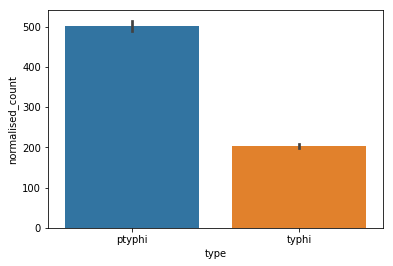

In [33]:
sns.barplot(x='type', y='normalised_count', data=df)

In [83]:
grouped = df.groupby(['type', 'seq']).mean()

In [84]:
grouped['type2'] = grouped.index.levels[0][ grouped.index.labels[0]]

In [118]:
pivoted = grouped.pivot_table(index='seq', values='normalised_count', columns='type2')

In [119]:
def percent_diff(df):
    
    value1 = df['ptyphi']
    value2 = df['typhi']
    
    pctdiff = abs(value1-value2)/((value1+value2)/2)*100
    
    return pctdiff

In [120]:
pivoted['pct_diff'] = pivoted.apply(percent_diff,axis=1)

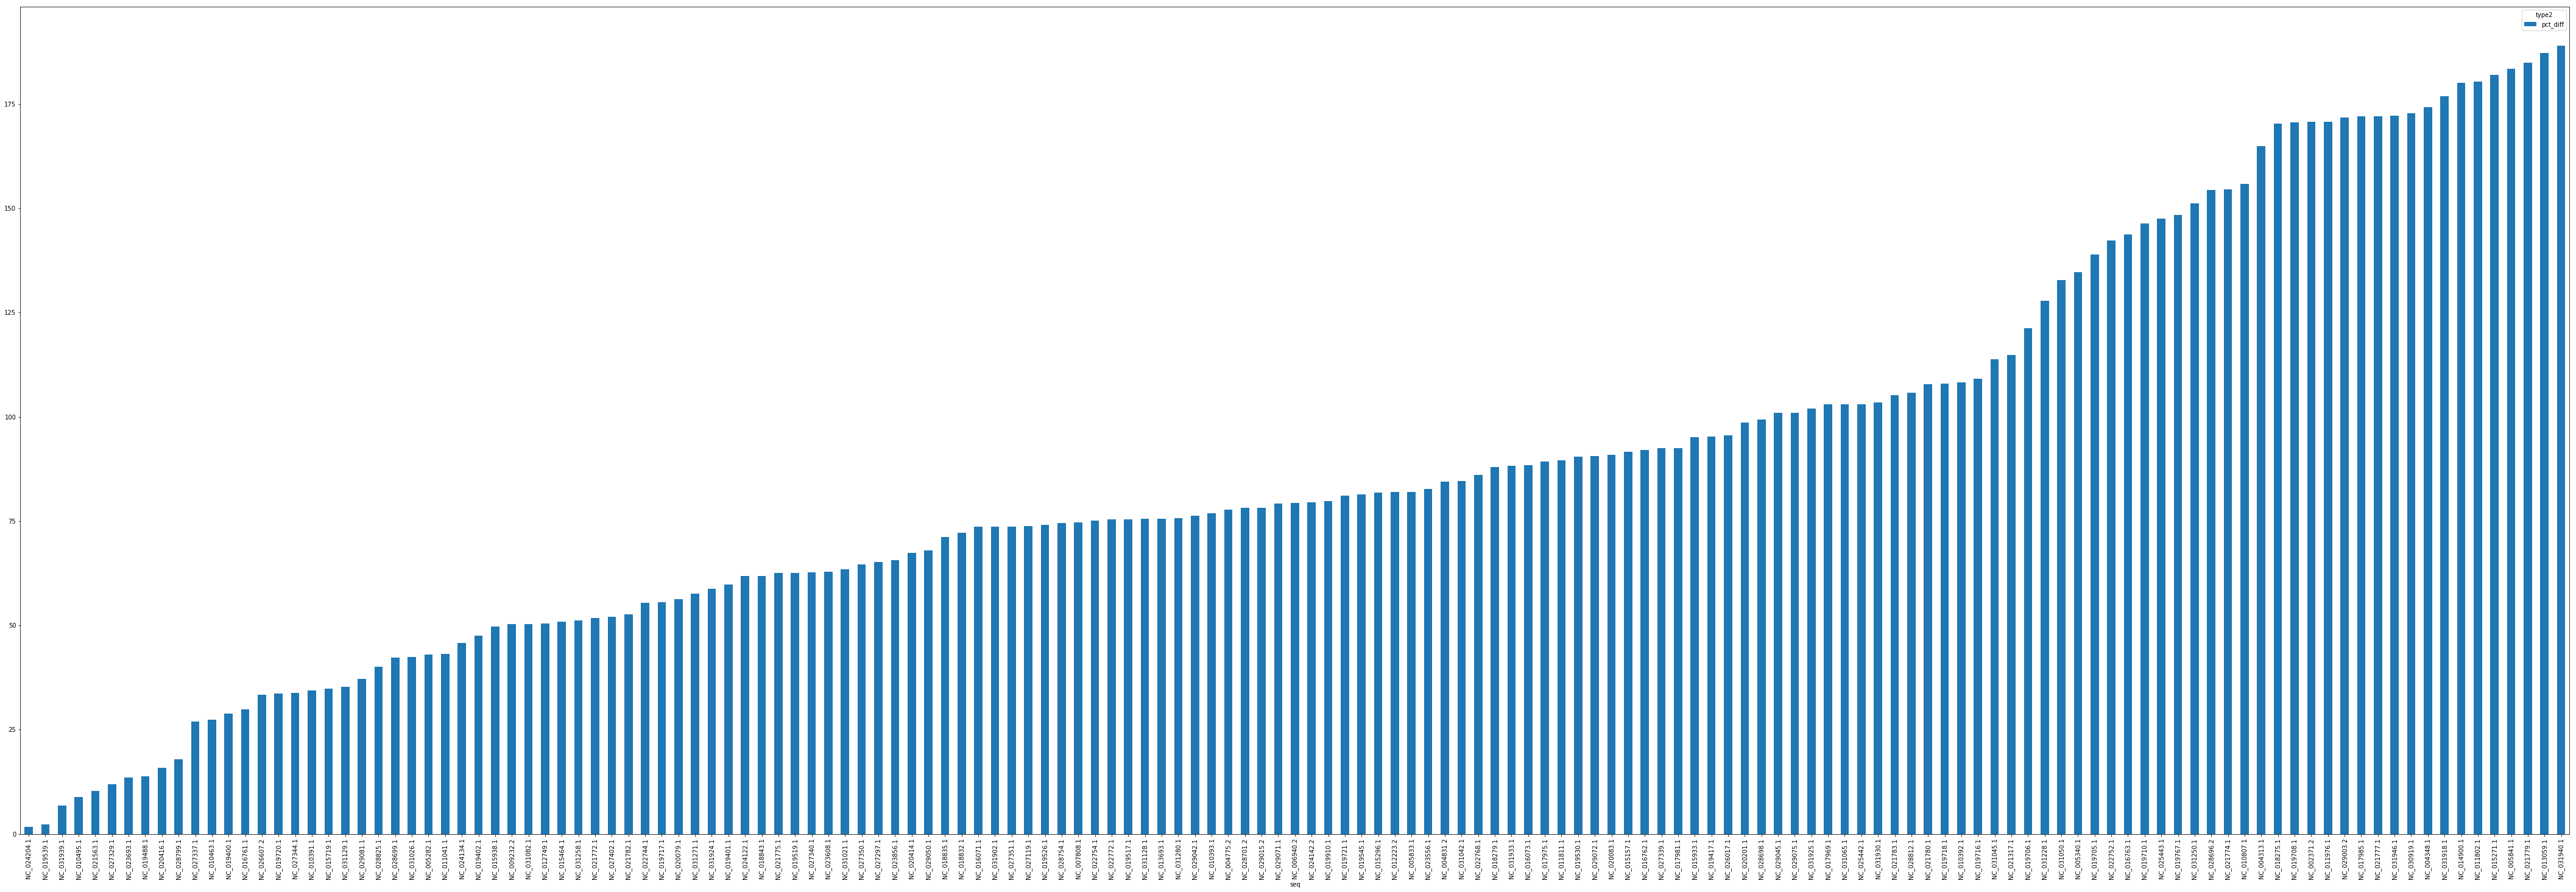

In [121]:
pivoted = pivoted.sort_values('pct_diff')


pivoted[['pct_diff']].plot(kind='bar', figsize =(75,25))

In [122]:
def pct_change(df):
    
    value1 = df['ptyphi']
    value2 = df['typhi']
    
    
    return ((value2-value1) / value1)*100

In [123]:
pivoted['pct_change'] = pivoted.apply(pct_change, axis=1)

In [124]:
pivoted = pivoted.sort_values('pct_change')

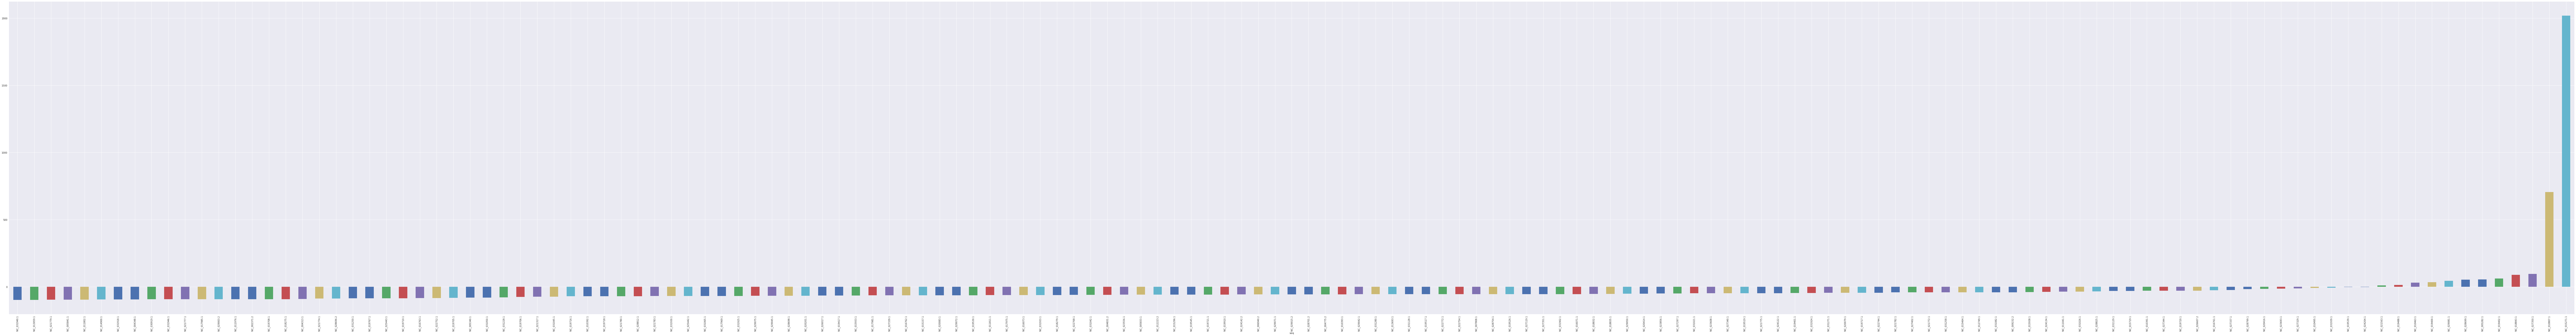

In [131]:
pivoted['pct_change'].plot(kind='bar', figsize =(200,25))

In [132]:
pivoted

type2,ptyphi,typhi,pct_diff,pct_change
seq,,,,
NC_031940.1,1861.909913,52.953438,188.938440,-97.155961
NC_013059.1,1493.228008,49.371995,187.197719,-96.693606
NC_021779.1,52.837849,2.068017,184.934092,-96.086107
NC_005841.1,3288.646564,141.948735,183.449084,-95.683673
NC_011802.1,3679.844500,189.625888,180.397742,-94.846905
NC_014900.1,4019.987064,211.279890,180.026797,-94.744264
NC_031918.1,31.665276,1.938496,176.925261,-93.878166
NC_004348.1,4955.844135,340.842507,174.259945,-93.122413
NC_030919.1,1754.276390,128.147780,172.769627,-92.695120
